# 4.10 Instacart Final Task

## Contents

### Importing Libraries and Dataframes
### Merging data sets
### Customer profiling
### Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure
### Compare customer profiles with regions and departments
### Visualizations

In [1]:
# import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# creating a path to load data fames to python 
path = r"C:\Users\pshan\Downloads\InstaCart Basket Analysis"

In [3]:
ords_prods_custs_excluded  = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_custs_excluded.pkl'))

In [4]:
ords_prods_custs_excluded.shape

(30964564, 34)

In [5]:
ords_prods_custs_excluded.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,last_name,gender,state,age,date_joined,number_of_dependants,family_status,income,region,activity_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity customer


In [6]:
department = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [7]:
department.shape

(21, 2)

In [8]:
department

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [9]:
department['department']

0              frozen
1               other
2              bakery
3             produce
4             alcohol
5       international
6           beverages
7                pets
8     dry goods pasta
9                bulk
10      personal care
11       meat seafood
12             pantry
13          breakfast
14       canned goods
15         dairy eggs
16          household
17             babies
18             snacks
19               deli
20            missing
Name: department, dtype: object

In [9]:
# merging df with department
df_merged = ords_prods_custs_excluded.merge(department, on='department_id')

In [10]:
df_merged.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_order_price', 'spender_flag', 'customer_frequency',
       'order_frequency_flag', 'first_name', 'last_name', 'gender', 'state',
       'age', 'date_joined', 'number_of_dependants', 'family_status', 'income',
       'region', 'activity_flag', 'department'],
      dtype='object')

In [11]:
df_merged.shape

(30964564, 35)

In [12]:
df_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,gender,state,age,date_joined,number_of_dependants,family_status,income,region,activity_flag,department
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity customer,beverages
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity customer,beverages
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity customer,beverages
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity customer,beverages
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity customer,beverages


### Creating a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. Then create images

In [14]:
# Initialize the 'customer_profile' column with default value
df_merged['customer_profile'] = 'Other'

# Single Adult
df_merged.loc[
    (df_merged['age'] <= 35) &
    (df_merged['number_of_dependants'] == 0) &
    (df_merged['department'].isin(['snacks', 'beverages', 'frozen', 'deli'])), # &
    #(df_merged['order_hour_of_day'].between(17, 22)),
    'customer_profile'
] = 'Single Adult'

# Young Parent
df_merged.loc[
    (df_merged['age'] <= 35) &
    (df_merged['number_of_dependants'] > 0) &
    (df_merged['department'].isin(['babies', 'snacks', 'breakfast', 'beverages'])),
    #& (df_merged['orders_day_of_week'].isin([2, 3, 4, 5, 6])),  # Weekdays
    'customer_profile'
] = 'Young Parent'

# Family-Oriented Shopper
df_merged.loc[
    (df_merged['age'] > 35) &
    (df_merged['number_of_dependants'] > 1) &
    (df_merged['department'].isin(['produce', 'dairy eggs', 'bakery', 'breakfast'])),
    # & (df_merged['order_hour_of_day'].between(6, 11)),
    'customer_profile'
] = 'Family-Oriented Shopper'

# Health-Conscious Shopper
df_merged.loc[
    (df_merged['department'].isin(['produce', 'beverages', 'personal care'])) &
    (df_merged['orders_day_of_week'].isin(range(7))),  # Any day
    'customer_profile'
] = 'Health-Conscious Shopper'

# Family Shopper
df_merged.loc[
    (df_merged['age'] > 30) &
    (df_merged['number_of_dependants'] > 1) &
    (df_merged['department'].isin(['produce', 'breakfast', 'dairy eggs', 'snacks'])),
    # &
    # (df_merged['order_hour_of_day'].between(17, 21)),
    'customer_profile'
] = 'Family Shopper'

# Impulse Shopper
df_merged.loc[
    (df_merged['department'].isin(['snacks', 'beverages', 'frozen', 'deli'])), 
    #&
    # (df_merged['order_hour_of_day'].between(22, 6)),
    'customer_profile'
] = 'Impulse Shopper'

# Weekend Bulk Shopper
df_merged.loc[
    (df_merged['department'].isin(['bulk', 'pantry', 'canned goods', 'dry goods pasta'])) &
    (df_merged['orders_day_of_week'].isin([0, 1])),  # Saturday or Sunday
    'customer_profile'
] = 'Weekend Bulk Shopper'

# Luxury Shopper
df_merged.loc[
    (df_merged['income'] > 80000) &
    (df_merged['department'].isin(['alcohol', 'international', 'personal care', 'meat seafood'])),
    'customer_profile'
] = 'Luxury Shopper'

# Late-Night Shopper
df_merged.loc[
    (df_merged['order_hour_of_day'].between(22, 6)),
    'customer_profile'
] = 'Late-Night Shopper'


In [15]:
df_merged['customer_profile'].value_counts( dropna = False)

customer_profile
Impulse Shopper             8463872
Other                       8002392
Family Shopper              5947819
Health-Conscious Shopper    5606572
Weekend Bulk Shopper        1334375
Luxury Shopper              1007774
Family-Oriented Shopper      401056
Young Parent                 200704
Name: count, dtype: int64

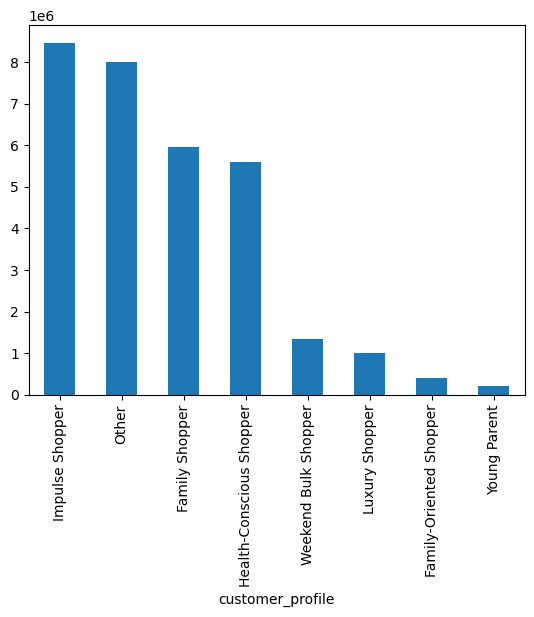

In [29]:
# plotting bar chart on 'orders_day_of_week'
customer_prof = df_merged['customer_profile'].value_counts().plot.bar()

In [30]:
# Export bar chart
customer_prof.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_profiles.png'))

### Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [17]:
df_merged.groupby('customer_profile').agg({'prices': ['min','mean', 'max'], 'order_number': ['min','mean', 'max']})

prices                  order_number               
                            min       mean   max          min       mean max
customer_profile                                                            
Family Shopper              1.0   8.100057  15.0            1  18.332896  99
Family-Oriented Shopper     1.0   7.866171  15.0            1  18.012769  99
Health-Conscious Shopper    1.0   7.978735  15.0            1  18.474769  99
Impulse Shopper             1.0   6.593763  15.0            1  17.352118  99
Luxury Shopper              1.0  11.928866  25.0            1  16.815348  99
Other                       1.0   8.178006  25.0            1  17.829197  99
Weekend Bulk Shopper        1.0   7.725498  20.0            1  16.632316  99
Young Parent                1.0   7.874120  15.0            1  18.431471  99

### Compare your customer profiles with regions and departments. Can you identify a link between them?

In [21]:
# crosstab age group vs department
region_cross = pd.crosstab(df_merged['customer_profile'], df_merged['region'], dropna = False)
region_cross

region,Midwest,Northeast,South,West
customer_profile,,,,
Family Shopper,1377626,1044200,1996515,1529478
Family-Oriented Shopper,93594,71274,131872,104316
Health-Conscious Shopper,1326998,987099,1858382,1434093
Impulse Shopper,1976811,1504917,2819725,2162419
Luxury Shopper,237711,178796,335348,255919
Other,1888683,1408743,2658518,2046448
Weekend Bulk Shopper,313527,233695,442299,344854
Young Parent,46563,35961,68480,49700


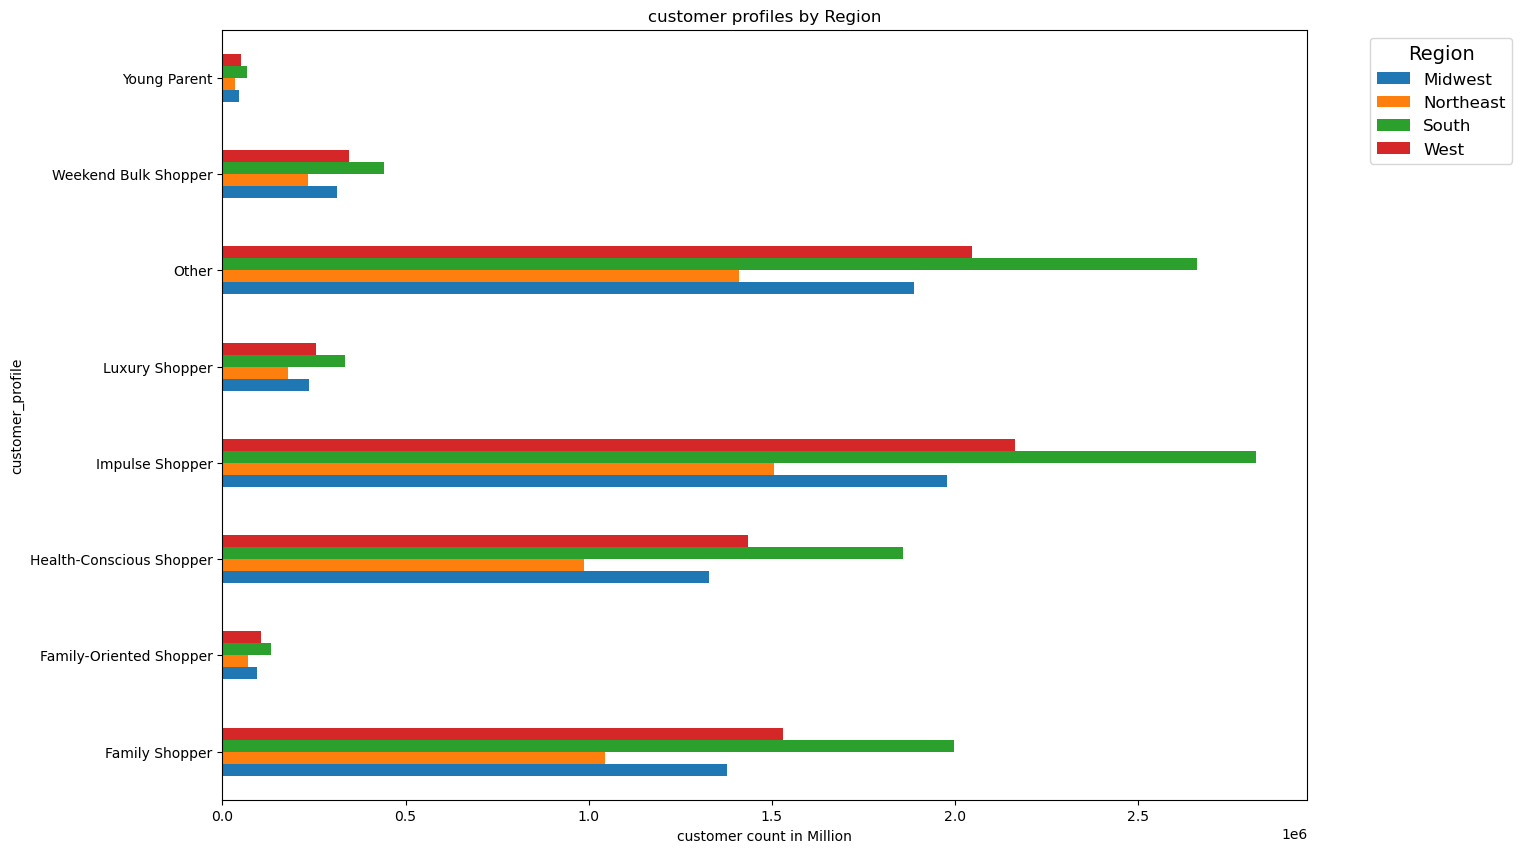

In [22]:
# bar chart
region_customer_bar = region_cross.plot(kind = 'barh', figsize=(14,10))
plt.title('customer profiles by Region')
plt.xlabel('customer count in Million')
plt.ylabel('customer_profile')
# Move legend outside of plot
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

#### the chart above demonstrates link between customer profiles and region, like are the different customer profils are distributed in different regions of the country

In [27]:
# Export bar chart
region_customer_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_region.png'))

In [23]:
dept_cross = pd.crosstab(df_merged['customer_profile'], df_merged['department'], dropna = False)
dept_cross

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
customer_profile,,,,,,,,,,,,,,,,,,,,,
Family Shopper,0,0,0,0,266184,0,0,2056333,0,0,...,0,0,0,0,0,0,0,0,3625302,0
Family-Oriented Shopper,0,0,401056,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Health-Conscious Shopper,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,152601,0,5453971,0
Impulse Shopper,0,0,0,2571901,0,0,0,0,1003834,0,...,0,0,0,0,0,0,0,0,0,2766406
Luxury Shopper,94519,0,0,0,0,0,0,0,0,0,...,0,170191,471359,0,0,0,271705,0,0,0
Other,50108,326215,719772,0,288139,21393,625838,3120849,0,509426,...,699857,85800,203422,64768,34411,1159334,0,93060,0,0
Weekend Bulk Shopper,0,0,0,0,0,12058,386236,0,0,312710,...,0,0,0,0,0,623371,0,0,0,0
Young Parent,0,84177,0,0,116527,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


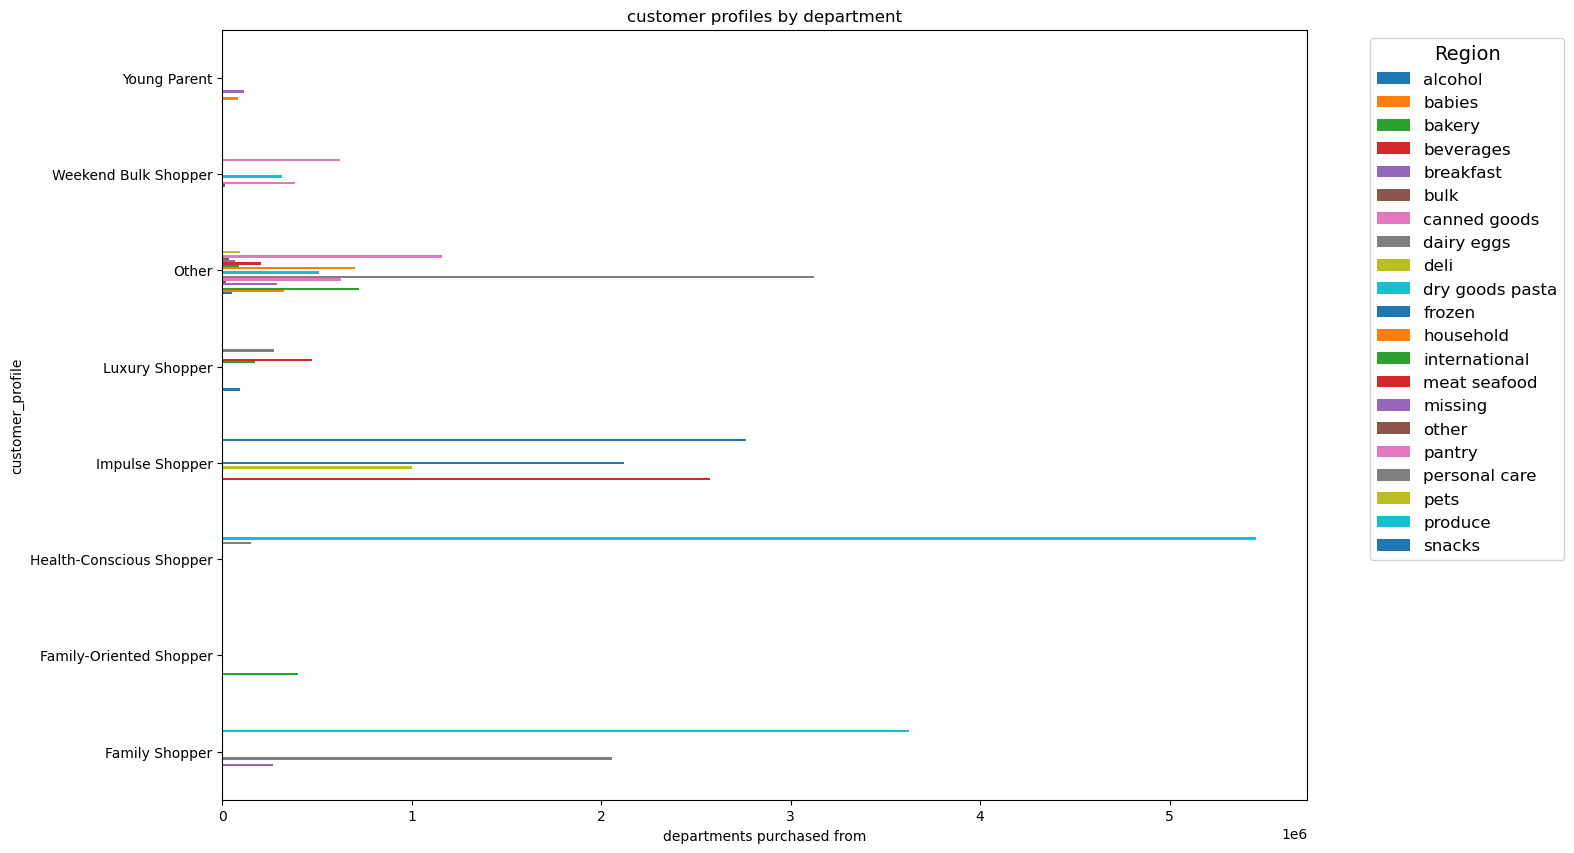

In [25]:
# bar
dept_customer_bar = dept_cross.plot(kind = 'barh', figsize=(14,10))
plt.title('customer profiles by department')
plt.xlabel('departments purchased from')
plt.ylabel('customer_profile')
# Move legend outside of plot
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

#### the char shows shopping behaviour of different customer_profiles, this can help target the relevant customer profiles with relevant adds 
#### these relationships can be further used to make more better marketing stategies for different regions, for example what are the shopping patterns of a luxury shoppers, with which departments they mostly interct with 

In [28]:
# Export bar chart
dept_customer_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_department.png'))

In [31]:
# Exporting new dataframe with department merged 
df_merged.to_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_customers_departments.pkl'))